# Chapter 12: Training Artificial Neural Networks for Image Recognition

In [1]:
from load_mnist import load_mnist
X_train, y_train = load_mnist('mnist', kind='train')
print('Row: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('mnist', kind='t10k')
print('Row: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Row: 60000, columns: 784
Row: 10000, columns: 784


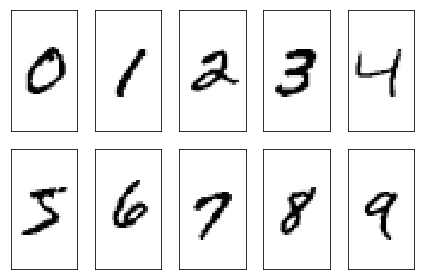

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

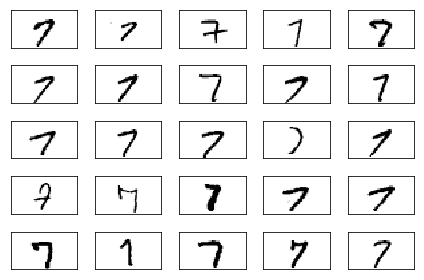

In [3]:
fig, ax = plt.subplots(nrows=5,
                      ncols=5,
                      sharex=True,
                      sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [4]:
#import numpy as np
#np.savetxt('train_img.csv', X_train,
#          fmt='%i', delimiter=',')
#np.savetxt('train_labels.csv', y_train,
#          fmt='%i', delimiter=',')
#np.savetxt('test_img.csv', X_test,
#          fmt='%i', delimiter=',')
#np.savetxt('test_labels.csv', y_test,
#          fmt='%i', delimiter=',')

In [5]:
#X_train = np.genfromtxt('train_img.csv',
#                       dtype=int, delimiter-',')
#y_train = np.genfromtxt('train_labels.csv',
#                       dtype=int, delimiter-',')
#X_test = np.genfromtxt('test_img.csv',
#                       dtype=int, delimiter-',')
#y_test = np.genfromtxt('test_labels.csv',
#                       dtype=int, delimiter-',')

In [6]:
from NeuralNetwork import NeuralNetMLP
nn = NeuralNetMLP(n_output=10,
                 n_features=X_train.shape[1],
                 n_hidden=50,
                 l2=0.1, l1=0.0,
                 epochs=1000, eta=0.001,
                 alpha=0.001,
                 decrease_const=0.00001,
                 shuffle=True,
                 minibatches=50,
                 random_state=1)

In [7]:
nn.fit(X_train, y_train, print_progress=True)

Epoch: 1000/1000

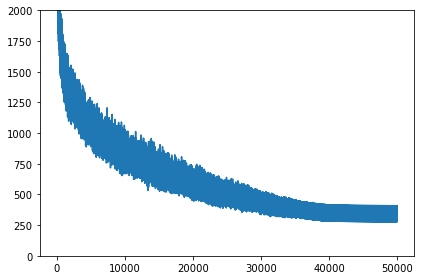

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.tight_layout()
plt.show()

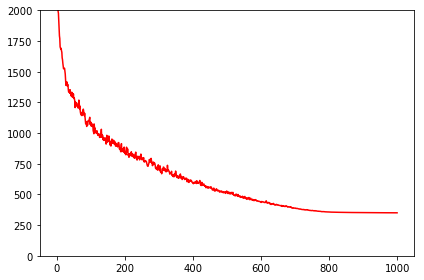

In [9]:
import numpy as np
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary =  np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylim([0, 2000])
plt.tight_layout()
plt.show()

In [10]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc*100))

Training accuracy: 97.83%


In [11]:
y_test_pred = nn.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc*100))

Test accuracy: 96.15%


result is not the same as the book

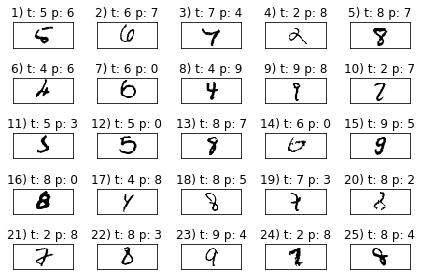

In [12]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [13]:
from GradientChecker import MLPGradientCheck
nn_check = MLPGradientCheck(n_output=10,
                           n_features=X_train.shape[1],
                           n_hidden=10,
                           l2=0.0, l1=0.0,
                           epochs=10,
                           eta=0.001, alpha=0.0,
                           decrease_const=0.0,
                           minibatches=1,
                           random_state=1)

In [14]:
nn_check.fit(X_train[:5], y_train[:5], print_progress=False)

Ok: 2.62620735439e-10
Ok: 2.92803525578e-10
Ok: 2.38507709029e-10
Ok: 2.38224129943e-10
Ok: 3.38054867447e-10
Ok: 3.58603965127e-10
Ok: 2.22343441192e-10
Ok: 2.33750083351e-10
Ok: 3.25653987614e-10
Ok: 2.15166998874e-10
